In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# to display all the columns
pd.pandas.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('loans_full_schema.csv')
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [64]:
df.shape

(10000, 62)

In [4]:
#Dropping emp title as it has 4000+ category 
df.drop('emp_title', axis = 1, inplace = True)

# Missing Fields

In [5]:
#make the list of features which has missing values
na_features = [features for features in df.columns if df[features].isnull().sum()>1]


#percentage of mission values
for feature in na_features:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

emp_length 0.0817  % missing values
debt_to_income 0.0024  % missing values
annual_income_joint 0.8505  % missing values
verification_income_joint 0.8545  % missing values
debt_to_income_joint 0.8505  % missing values
months_since_last_delinq 0.5658  % missing values
months_since_90d_late 0.7715  % missing values
months_since_last_credit_inquiry 0.1271  % missing values
num_accounts_120d_past_due 0.0318  % missing values


# Relation between missing values and interest_rate

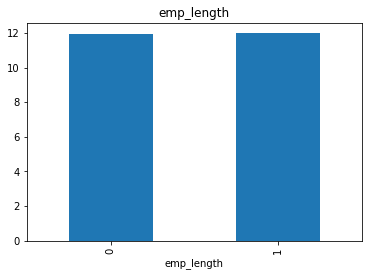

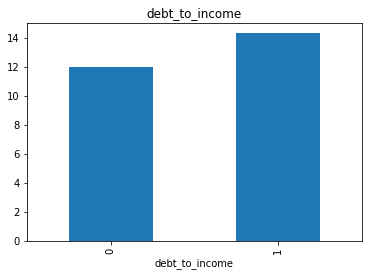

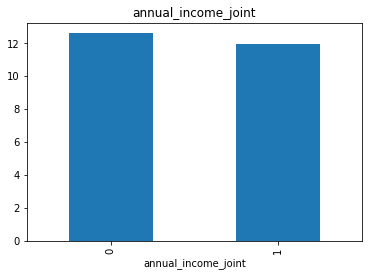

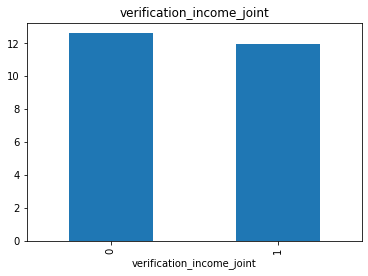

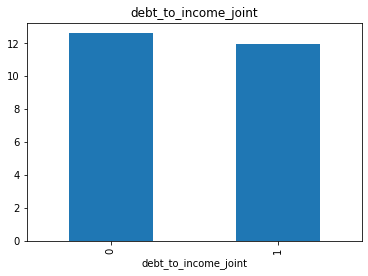

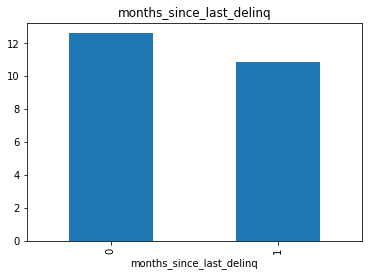

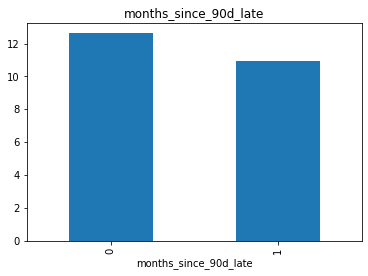

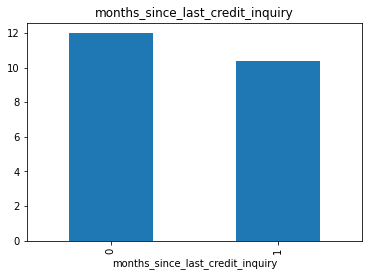

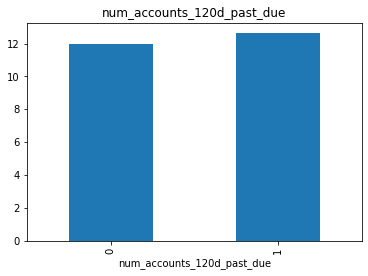

In [6]:
for feature in na_features:
    data = df.copy()
    
    # adding a new feature just to indicate if the observation was missing
    data[feature] = np.where(data[feature].isnull(),1,0)

    #median  where the the info was missing
    data.groupby(feature)['interest_rate'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [7]:
#the above graphs show how interst rate differ if there are missing value in particluar feature

# Listing out all numerical features

In [8]:
#listing all the numberical features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']

print('Total Numerical features are: ', len(num_features))

Total Numerical features are:  42


In [65]:
num_features

['emp_length',
 'annual_income',
 'debt_to_income',
 'annual_income_joint',
 'debt_to_income_joint',
 'delinq_2y',
 'months_since_last_delinq',
 'earliest_credit_line',
 'inquiries_last_12m',
 'total_credit_lines',
 'open_credit_lines',
 'total_credit_limit',
 'total_credit_utilized',
 'num_collections_last_12m',
 'num_historical_failed_to_pay',
 'months_since_90d_late',
 'current_accounts_delinq',
 'total_collection_amount_ever',
 'current_installment_accounts',
 'accounts_opened_24m',
 'months_since_last_credit_inquiry',
 'num_satisfactory_accounts',
 'num_accounts_120d_past_due',
 'num_accounts_30d_past_due',
 'num_active_debit_accounts',
 'total_debit_limit',
 'num_total_cc_accounts',
 'num_open_cc_accounts',
 'num_cc_carrying_balance',
 'num_mort_accounts',
 'account_never_delinq_percent',
 'tax_liens',
 'public_record_bankrupt',
 'loan_amount',
 'term',
 'interest_rate',
 'installment',
 'balance',
 'paid_total',
 'paid_principal',
 'paid_interest',
 'paid_late_fees']

In [9]:
df[num_features].head()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,3.0,90000.0,18.01,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,28000,60,14.07,652.53,27015.86,1999.33,984.14,1015.19,0.0
1,10.0,40000.0,5.04,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,5000,36,12.61,167.54,4651.37,499.12,348.63,150.49,0.0
2,3.0,40000.0,21.15,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,2000,36,17.09,71.40,1824.63,281.80,175.37,106.43,0.0
3,1.0,30000.0,10.16,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,21600,36,6.72,664.19,18853.26,3312.89,2746.74,566.15,0.0
4,10.0,35000.0,57.96,57000.0,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,23000,36,14.07,786.87,21430.15,2324.65,1569.85,754.80,0.0


# Listing out temporal features

In [10]:
tempo_var = ['earliest_credit_line', 'issue_month']
tempo_var

for feature in tempo_var:
    print(feature, df[feature].unique())
    

earliest_credit_line [2001 1996 2006 2007 2008 1990 2004 2005 1998 2000 1984 1995 2003 1991
 2002 1997 1999 2009 2013 1982 1993 1988 1977 1980 2012 1992 1972 2010
 2011 1975 1983 1994 2014 1989 1986 1978 1987 1969 1985 1976 1974 2015
 1981 1979 1971 1973 1967 1966 1963 1968 1970 1965 1964]
issue_month ['Mar-2018' 'Feb-2018' 'Jan-2018']


Text(0.5, 1.0, 'earliest_credit_line vs interest_rate')

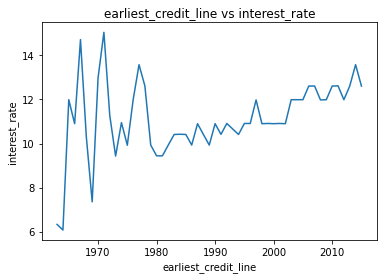

In [11]:
# relation between interest rate and earliest_credit_line
df.groupby('earliest_credit_line')['interest_rate'].median().plot()
plt.xlabel('earliest_credit_line')
plt.ylabel('interest_rate')
plt.title("earliest_credit_line vs interest_rate")

In [12]:
# We can see that for customers after 1980 interest rate is somewhat incresing 

# Seperating Continious and Discrete Features

## Discrete Features

In [13]:
#considering a feature is discrete if it has less than 10 unique values 

dis_features = [feature for feature in num_features if len(df[feature].unique())<10 and feature not in tempo_var]
print("Discrete Variables Count: {}".format(len(dis_features)))

Discrete Variables Count: 8


In [14]:
dis_features

['num_collections_last_12m',
 'num_historical_failed_to_pay',
 'current_accounts_delinq',
 'num_accounts_120d_past_due',
 'num_accounts_30d_past_due',
 'tax_liens',
 'public_record_bankrupt',
 'term']

In [15]:
df[dis_features].head()

,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,num_accounts_120d_past_due,num_accounts_30d_past_due,tax_liens,public_record_bankrupt,term
0,0,0,0,0.0,0,0,0,60
1,0,1,0,0.0,0,0,1,36
2,0,0,0,0.0,0,0,0,36
3,0,1,0,0.0,0,1,0,36
4,0,0,0,0.0,0,0,0,36


# Relationship between discreate features and interest rates

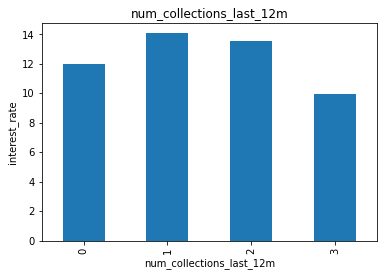

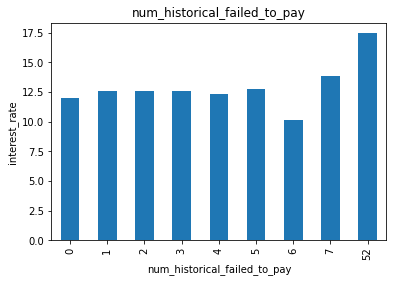

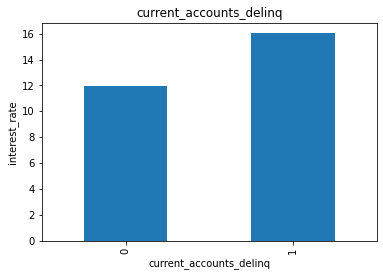

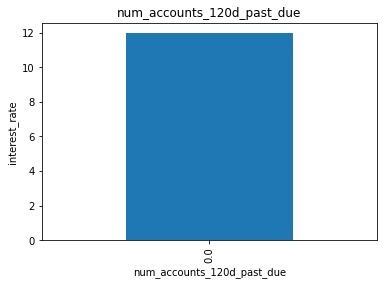

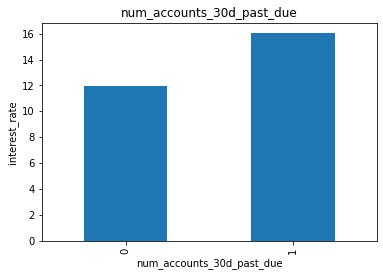

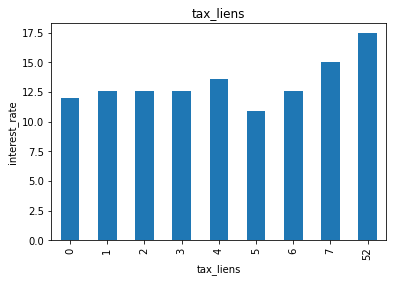

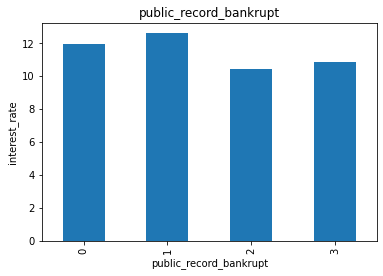

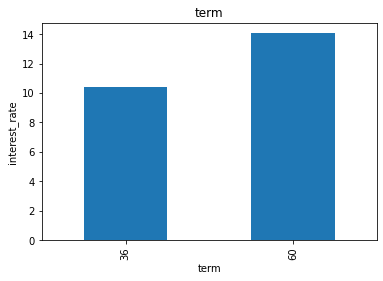

In [16]:
for feature in dis_features:
    data=df.copy()
    data.groupby(feature)['interest_rate'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('interest_rate')
    plt.title(feature)
    plt.show()

## Continuous Features

In [17]:
#Listing out continious variables
con_feature=[feature for feature in num_features if feature not in dis_features]
print("Continuous feature Count {}".format(len(con_feature)))

Continuous feature Count 34


In [18]:
con_feature

['emp_length',
 'annual_income',
 'debt_to_income',
 'annual_income_joint',
 'debt_to_income_joint',
 'delinq_2y',
 'months_since_last_delinq',
 'earliest_credit_line',
 'inquiries_last_12m',
 'total_credit_lines',
 'open_credit_lines',
 'total_credit_limit',
 'total_credit_utilized',
 'months_since_90d_late',
 'total_collection_amount_ever',
 'current_installment_accounts',
 'accounts_opened_24m',
 'months_since_last_credit_inquiry',
 'num_satisfactory_accounts',
 'num_active_debit_accounts',
 'total_debit_limit',
 'num_total_cc_accounts',
 'num_open_cc_accounts',
 'num_cc_carrying_balance',
 'num_mort_accounts',
 'account_never_delinq_percent',
 'loan_amount',
 'interest_rate',
 'installment',
 'balance',
 'paid_total',
 'paid_principal',
 'paid_interest',
 'paid_late_fees']

# Relationship between discreate features and interest rates

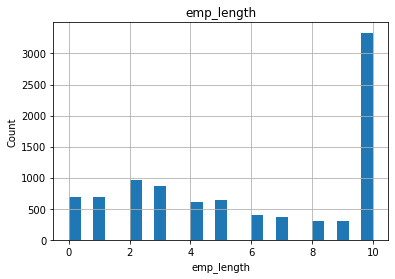

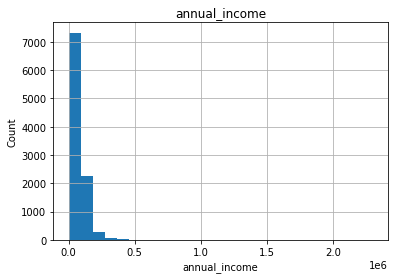

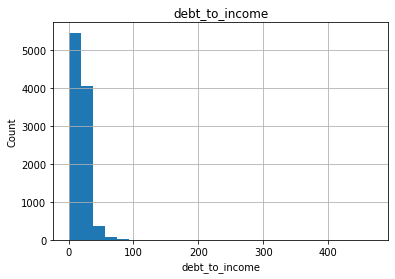

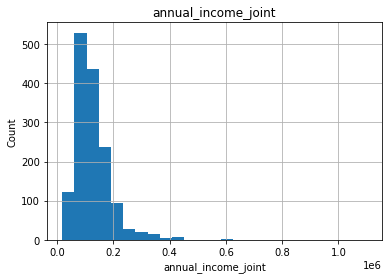

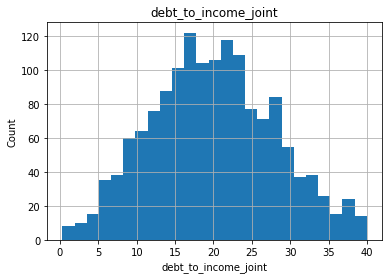

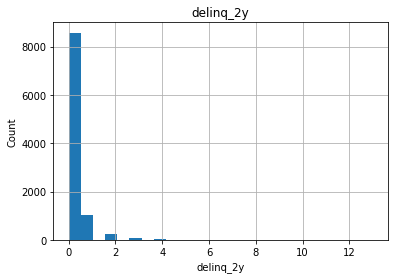

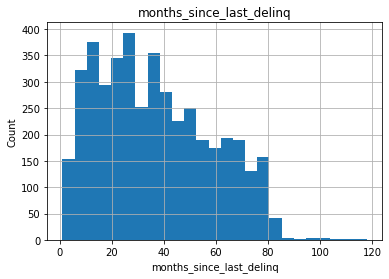

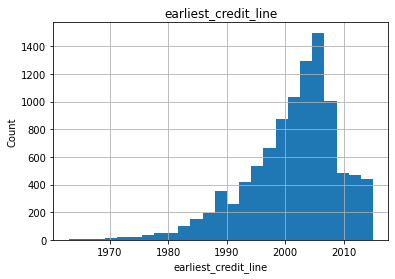

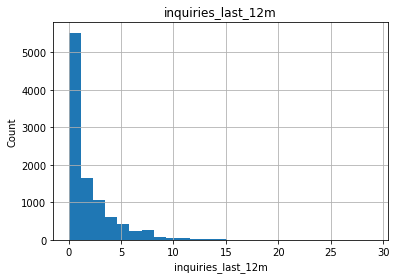

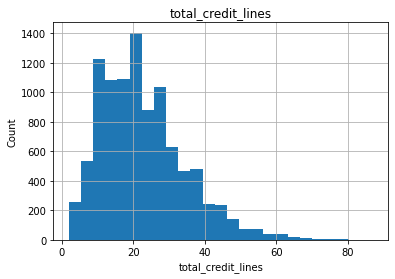

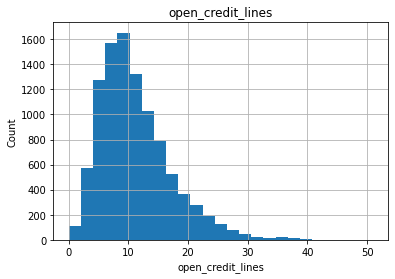

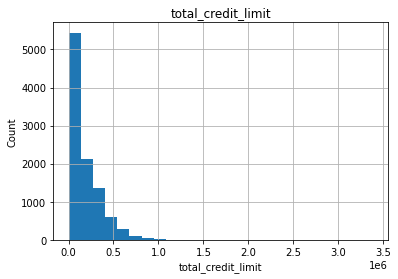

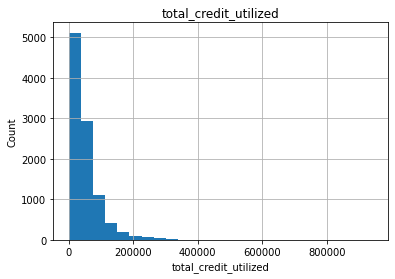

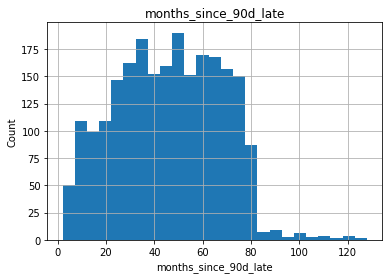

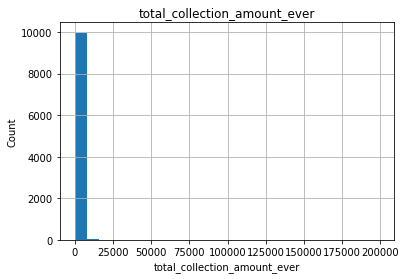

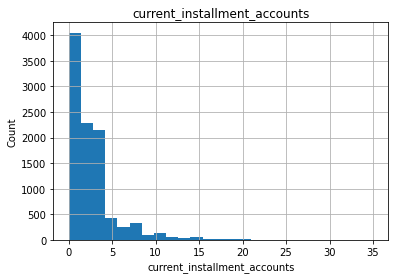

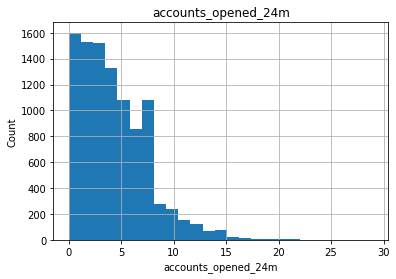

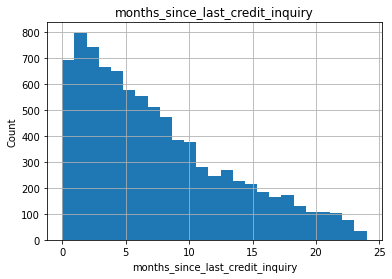

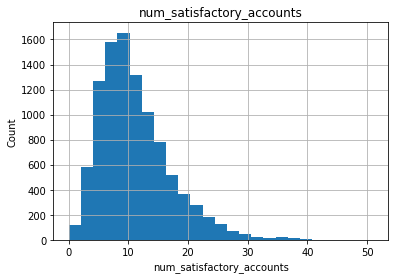

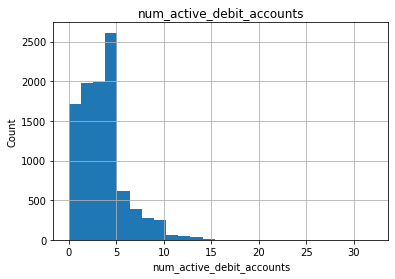

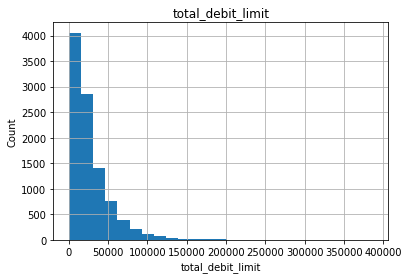

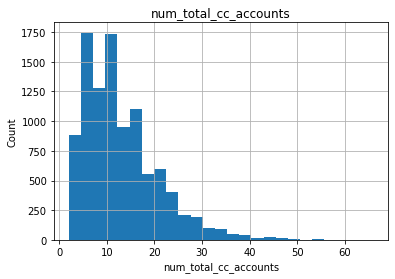

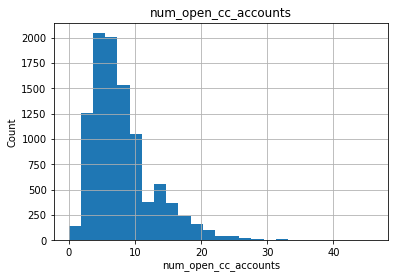

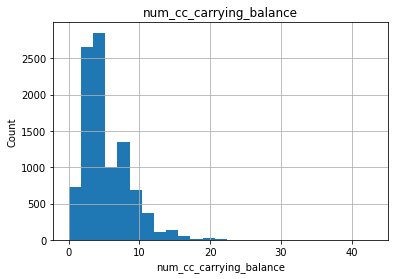

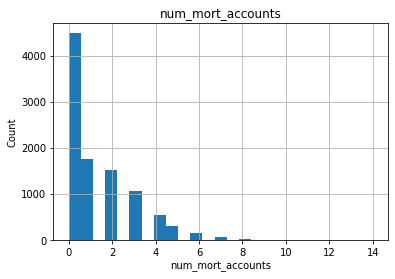

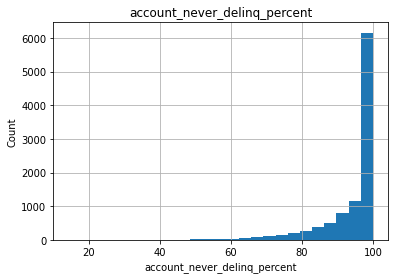

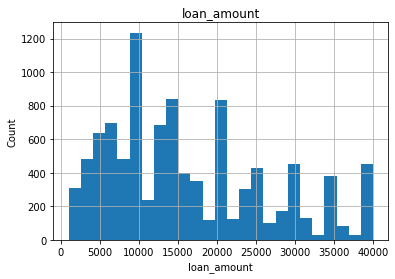

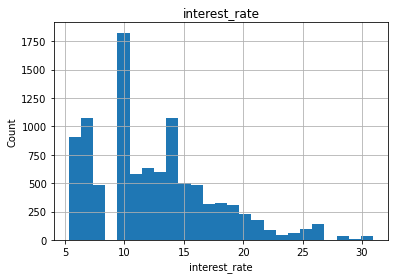

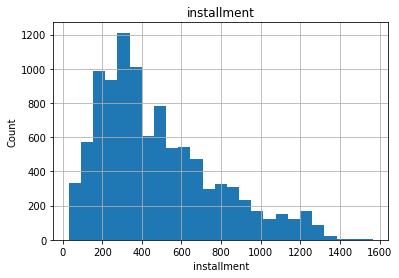

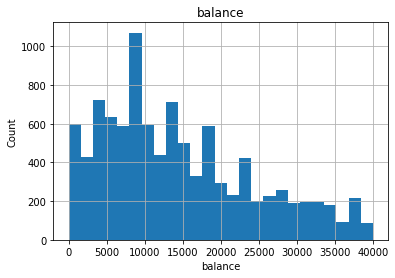

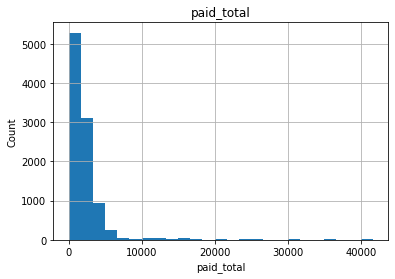

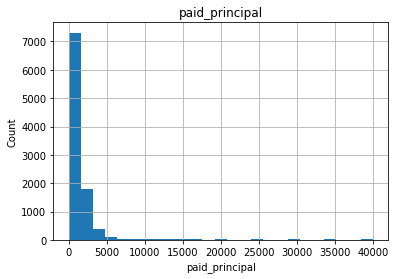

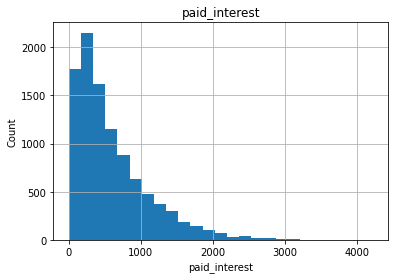

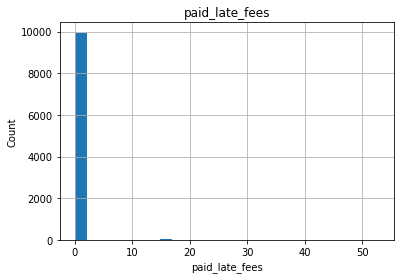

In [19]:
for feature in con_feature:
    data= df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [20]:
# If we want to apply regression at a later stage it's best to convert the continious feature to normal distribution

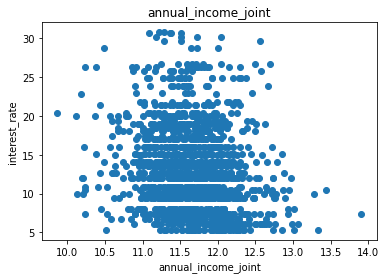

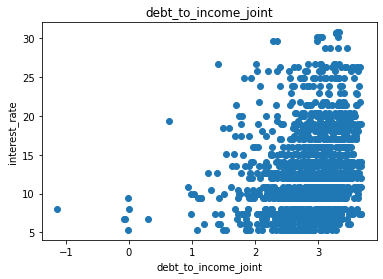

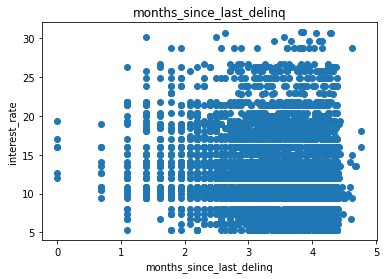

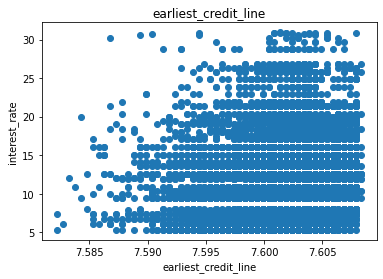

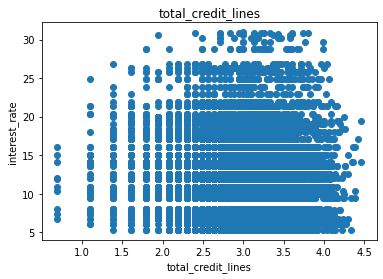

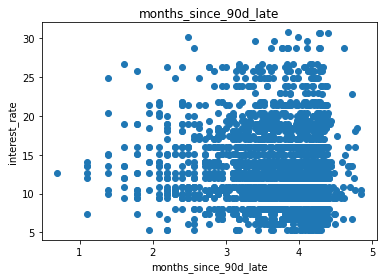

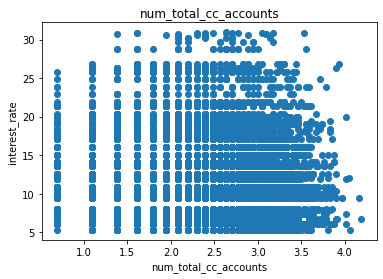

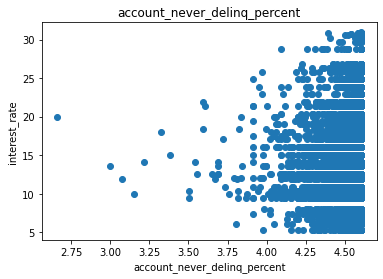

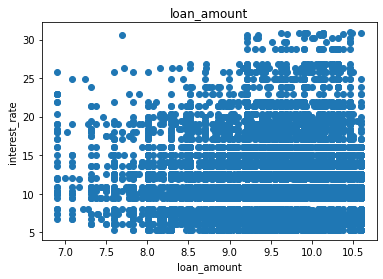

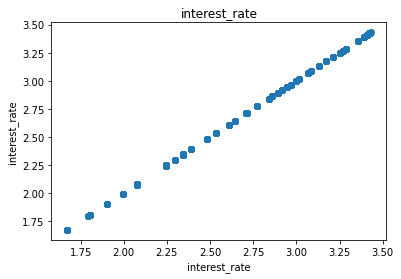

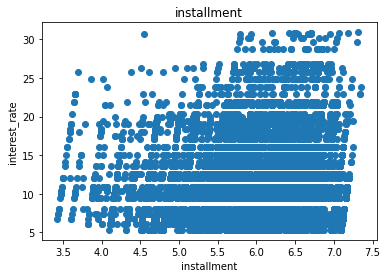

In [21]:
for feature in con_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        #data['interest_rate'] = np.log(data['interest_rate'])
        
        plt.scatter(data[feature], data['interest_rate'])
        plt.xlabel(feature)
        plt.ylabel('interest_rate')
        plt.title(feature)
        plt.show()
        
        

# Checking for outliers

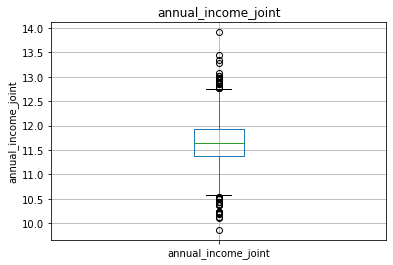

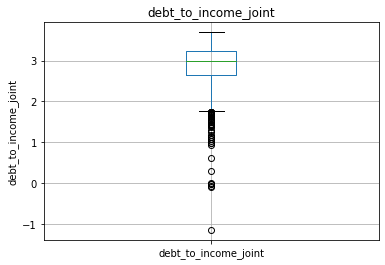

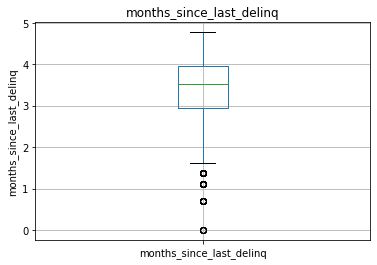

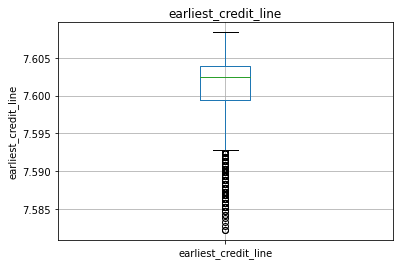

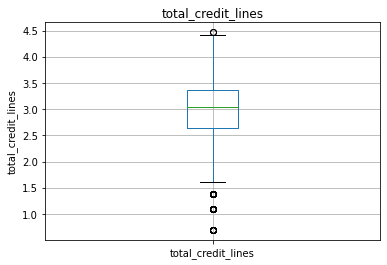

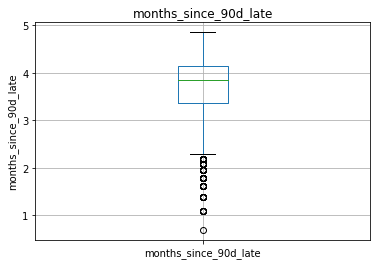

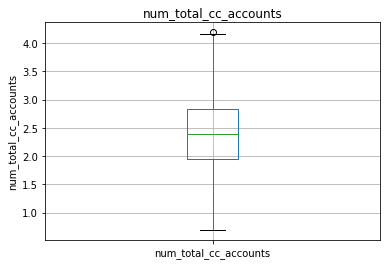

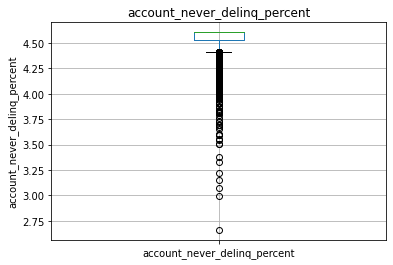

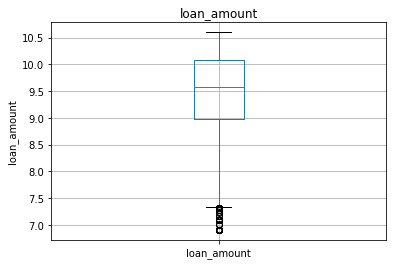

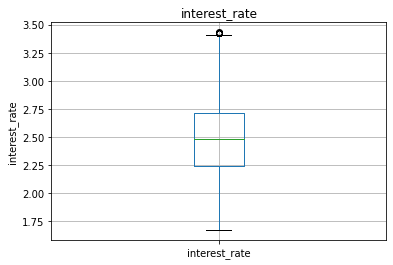

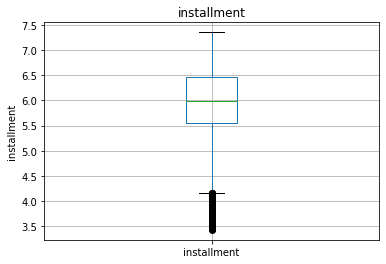

In [22]:
for feature in con_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Categorical Features

In [23]:
#listing out categorocal features
cat_features=[feature for feature in df.columns if df[feature].dtypes=='O']
cat_features

['state',
 'homeownership',
 'verified_income',
 'verification_income_joint',
 'loan_purpose',
 'application_type',
 'grade',
 'sub_grade',
 'issue_month',
 'loan_status',
 'initial_listing_status',
 'disbursement_method']

In [24]:
df[cat_features].head()

,state,homeownership,verified_income,verification_income_joint,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
0,NJ,MORTGAGE,Verified,NaN,moving,individual,C,C3,Mar-2018,Current,whole,Cash
1,HI,RENT,Not Verified,NaN,debt_consolidation,individual,C,C1,Feb-2018,Current,whole,Cash
2,WI,RENT,Source Verified,NaN,other,individual,D,D1,Feb-2018,Current,fractional,Cash
3,PA,RENT,Not Verified,NaN,debt_consolidation,individual,A,A3,Jan-2018,Current,whole,Cash
4,CA,RENT,Verified,Verified,credit_card,joint,C,C3,Mar-2018,Current,whole,Cash


In [25]:
#checking for number of category
for feature in cat_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is state and number of categories are 50
The feature is homeownership and number of categories are 3
The feature is verified_income and number of categories are 3
The feature is verification_income_joint and number of categories are 4
The feature is loan_purpose and number of categories are 12
The feature is application_type and number of categories are 2
The feature is grade and number of categories are 7
The feature is sub_grade and number of categories are 32
The feature is issue_month and number of categories are 3
The feature is loan_status and number of categories are 6
The feature is initial_listing_status and number of categories are 2
The feature is disbursement_method and number of categories are 2


In [26]:
#removing the 1st catergory i.e emp_title as there are 4724 different types
#cat_features.pop(0)

In [27]:
cat_features

['state',
 'homeownership',
 'verified_income',
 'verification_income_joint',
 'loan_purpose',
 'application_type',
 'grade',
 'sub_grade',
 'issue_month',
 'loan_status',
 'initial_listing_status',
 'disbursement_method']

# Relation betweeen categorical variable and interest rate

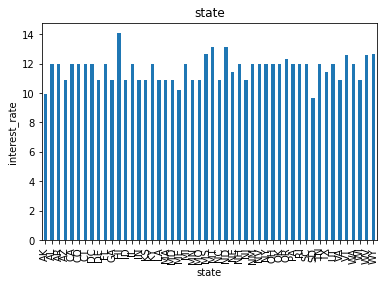

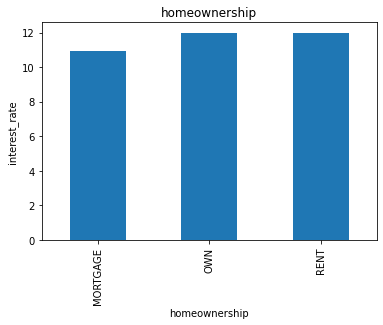

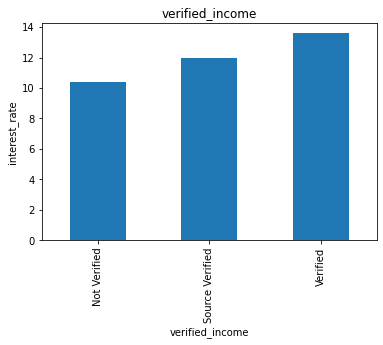

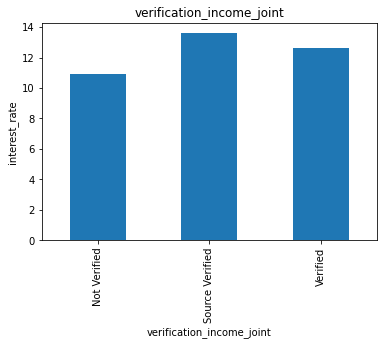

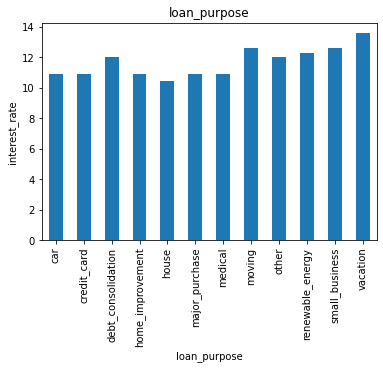

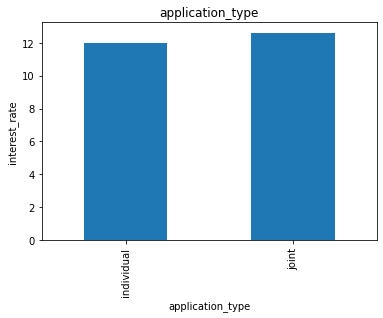

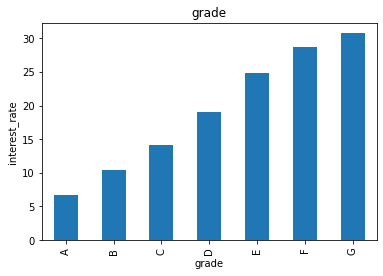

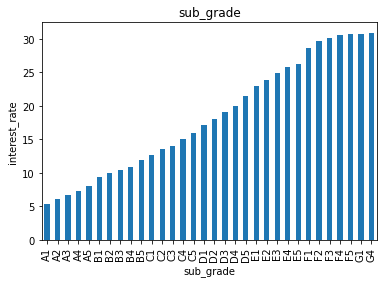

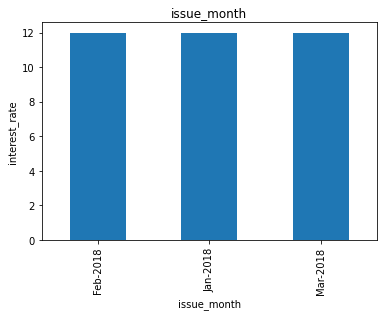

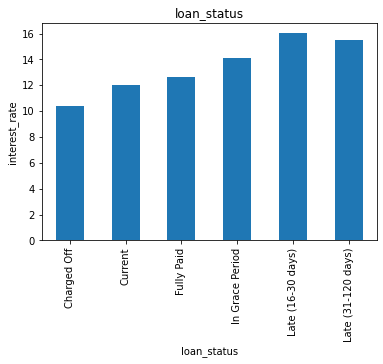

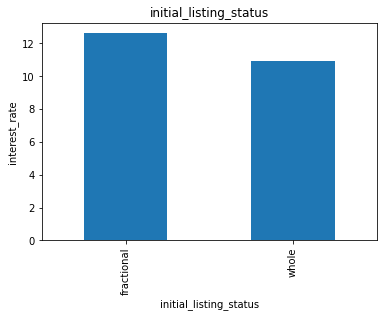

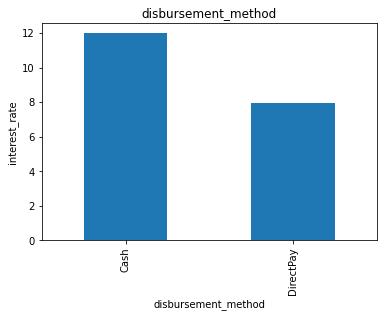

In [28]:
for feature in cat_features:
    data=df.copy()
    data.groupby(feature)['interest_rate'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('interest_rate')
    plt.title(feature)
    plt.show()

# Handeling Missing categorical value

In [29]:
na_features_cat=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in na_features_cat:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

verification_income_joint: 0.8545% missing values


In [30]:
## Replacing missing value with a new label
def replace_cat_feature(df,na_features_cat):
    data=df.copy()
    data[na_features_cat]=data[na_features_cat].fillna('Missing')
    return data

dataset=replace_cat_feature(df,na_features_cat)

dataset[na_features_cat].isnull().sum()


verification_income_joint    0
dtype: int64

# Handeling Missing numerical value 

In [31]:
na_features_num=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

for feature in na_features_num:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

emp_length: 0.0817% missing values
debt_to_income: 0.0024% missing values
annual_income_joint: 0.8505% missing values
debt_to_income_joint: 0.8505% missing values
months_since_last_delinq: 0.5658% missing values
months_since_90d_late: 0.7715% missing values
months_since_last_credit_inquiry: 0.1271% missing values
num_accounts_120d_past_due: 0.0318% missing values


In [32]:
## Replacing the numerical Missing Values with median as there are some outliers present

for feature in na_features_num:
    median_value=df[feature].median()
    
    ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)
    
df[na_features_num].isnull().sum()

emp_length                          0
debt_to_income                      0
annual_income_joint                 0
debt_to_income_joint                0
months_since_last_delinq            0
months_since_90d_late               0
months_since_last_credit_inquiry    0
num_accounts_120d_past_due          0
dtype: int64

In [33]:
df.head()

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,emp_lengthnan,debt_to_incomenan,annual_income_jointnan,debt_to_income_jointnan,months_since_last_delinqnan,months_since_90d_latenan,months_since_last_credit_inquirynan,num_accounts_120d_past_duenan
0,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,113000.0,NaN,19.72,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,0,0,1,1,0,0,0,0
1,10.0,HI,RENT,40000.0,Not Verified,5.04,113000.0,NaN,19.72,0,34.0,1996,1,30,14,28800,4321,0,1,47.0,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,0,0,1,1,1,1,0,0
2,3.0,WI,RENT,40000.0,Source Verified,21.15,113000.0,NaN,19.72,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,0,0,1,1,0,0,0,0
3,1.0,PA,RENT,30000.0,Not Verified,10.16,113000.0,NaN,19.72,0,34.0,2007,0,4,4,25400,4997,0,1,47.0,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,0,0,1,1,1,1,0,0
4,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,34.0,2008,7,22,16,69839,52722,0,0,47.0,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,0,0,0,0,1,1,0,0


# handeling rare category 

In [34]:
#category with less than 1 percent apperace is considered rare catregory 
for feature in cat_features:
    temp=dataset.groupby(feature)['interest_rate'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

In [35]:
df.head(50)

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,emp_lengthnan,debt_to_incomenan,annual_income_jointnan,debt_to_income_jointnan,months_since_last_delinqnan,months_since_90d_latenan,months_since_last_credit_inquirynan,num_accounts_120d_past_duenan
0,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,113000.0,Rare_var,19.72,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,Rare_var,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.330000,984.14,1015.19,0.0,0,0,1,1,0,0,0,0
1,10.0,Rare_var,RENT,40000.0,Not Verified,5.04,113000.0,Rare_var,19.72,0,34.0,1996,1,30,14,28800,4321,0,1,47.0,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.120000,348.63,150.49,0.0,0,0,1,1,1,1,0,0
2,3.0,WI,RENT,40000.0,Source Verified,21.15,113000.0,Rare_var,19.72,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.800000,175.37,106.43,0.0,0,0,1,1,0,0,0,0
3,1.0,PA,RENT,30000.0,Not Verified,10.16,113000.0,Rare_var,19.72,0,34.0,2007,0,4,4,25400,4997,0,1,47.0,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.890000,2746.74,566.15,0.0,0,0,1,1,1,1,0,0
4,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,34.0,2008,7,22,16,69839,52722,0,0,47.0,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.650000,1569.85,754.80,0.0,0,0,0,0,1,1,0,0
5,6.0,Rare_var,OWN,34000.0,Not Verified,6.46,113000.0,Rare_var,19.72,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0,0,other,individual,5000,36,6.72,153.75,A,A3,Jan-2018,Current,whole,Cash,4256.71,873.130000,743.29,129.84,0.0,1,0,1,1,0,0,0,0
6,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,0,34.0,2004,1,12,10,291852,18916,0,0,47.0,0,0,2,1,9.0,10,0.0,0,3,9100,8,7,6,2,100.0,0,0,credit_card,joint,24000,60,13.59,553.35,C,C2,Jan-2018,Current,whole,Cash,22560.00,2730.510000,1440.00,1290.51,0.0,0,0,0,0,1,1,0,0
7,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,113000.0,Rare_var,19.72,1,19.0,2005,1,30,15,342336,60805,0,0,71.0,0,0,2,4,7.0,15,0.0,0,5,22250,16,12,10,7,93.0,0,0,debt_consolidation,individual,20000,60,11.99,444.79,B,B5,Jan-2018,Current,whole,Cash,19005.39,1765.840000,994.61,771.23,0.0,0,0,1,1,0,0,0,1
8,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,113000.0,Rare_var,19.72,1,18.0,1998,3,35,21,283190,69561,0,0,18.0,0,0,6,10,4.0,21,0.0,0,11,36700,19,14,14,2,97.1,0,0,home_improvement,individual,20000,36,13.59,679.58,C,C2,Feb-2018,Current,whole,Cash,18156.66,2703.220000,1843.34,859.88,0.0,0,0,1,1,0,0,0,0
9,3.0,IL,RENT,30000.0,Not Verified,18.91,113000.0,Rare_var,19.72,0,34.0,2001,0,9,6,33114,17768,0,0,47.0,0,0,1,5,17.0,6,0.0,0,3,14700,7,5,3,0,100.0,0,0,credit_card,individual,6400

In [36]:
#Handeling categorical variable and converting it to numberical
for feature in cat_features:
    labels_ordered=df.groupby([feature])['interest_rate'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [37]:
df.head()

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,emp_lengthnan,debt_to_incomenan,annual_income_jointnan,debt_to_income_jointnan,months_since_last_delinqnan,months_since_90d_latenan,months_since_last_credit_inquirynan,num_accounts_120d_past_duenan
0,3.0,2,0,90000.0,2,18.01,113000.0,1,19.72,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,9,0,28000,60,14.07,652.53,2,12,1,0,0,1,27015.86,1999.33,984.14,1015.19,0.0,0,0,1,1,0,0,0,0
1,10.0,17,2,40000.0,0,5.04,113000.0,1,19.72,0,34.0,1996,1,30,14,28800,4321,0,1,47.0,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,8,0,5000,36,12.61,167.54,2,10,2,0,0,1,4651.37,499.12,348.63,150.49,0.0,0,0,1,1,1,1,0,0
2,3.0,10,2,40000.0,1,21.15,113000.0,1,19.72,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,6,0,2000,36,17.09,71.40,3,15,2,0,1,1,1824.63,281.80,175.37,106.43,0.0,0,0,1,1,0,0,0,0
3,1.0,6,2,30000.0,0,10.16,113000.0,1,19.72,0,34.0,2007,0,4,4,25400,4997,0,1,47.0,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,8,0,21600,36,6.72,664.19,0,2,0,0,0,1,18853.26,3312.89,2746.74,566.15,0.0,0,0,1,1,1,1,0,0
4,10.0,11,2,35000.0,2,57.96,57000.0,2,37.66,0,34.0,2008,7,22,16,69839,52722,0,0,47.0,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,1,1,23000,36,14.07,786.87,2,12,1,0,0,1,21430.15,2324.65,1569.85,754.80,0.0,0,0,0,0,1,1,0,0


# Feature Scaling

In [38]:
scaling_feature=[feature for feature in df.columns if feature not in ['interest_rate'] ]
len(scaling_feature)

61

In [39]:
feature_scale=[feature for feature in df.columns if feature not in ['interest_rate']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [40]:
scaler.transform(df[feature_scale])

array([[0.3       , 0.07407407, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.62962963, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.3       , 0.37037037, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.1       , 0.37037037, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.3       , 1.        , 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [41]:
# transform the dataset, and add on the interest rate
data = pd.concat([df[['interest_rate']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

# Modeling

In [42]:
df_modelling = data.copy()

In [43]:
df_modelling.drop('interest_rate', axis = 1, inplace = True)

In [44]:
X = df_modelling.copy()

In [45]:
y = data['interest_rate']

# Feature Selection

In [46]:
#Using Lasso regression to find the right features
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [47]:
feature_sel_model.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True,  True,  True,
        True,  True, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False])

In [48]:
#total selected features

#list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 61
selected features: 9


In [49]:
X = X[selected_feat]

In [61]:
selected_feat

Index(['loan_amount', 'grade', 'sub_grade', 'issue_month', 'loan_status',
       'initial_listing_status', 'balance', 'paid_interest',
       'months_since_last_delinqnan'],
      dtype='object')

In [50]:
X

,loan_amount,grade,sub_grade,issue_month,loan_status,initial_listing_status,balance,paid_interest,months_since_last_delinqnan
0,0.692308,0.4,0.60,0.5,0.0,0.0,0.675397,0.240769,0.0
1,0.102564,0.4,0.50,1.0,0.0,0.0,0.116284,0.035691,1.0
2,0.025641,0.6,0.75,1.0,0.0,1.0,0.045616,0.025242,0.0
3,0.528205,0.0,0.10,0.0,0.0,0.0,0.471331,0.134272,1.0
4,0.564103,0.4,0.60,0.5,0.0,0.0,0.535754,0.179014,1.0
...,...,...,...,...,...,...,...,...,...
9995,0.589744,0.0,0.15,0.0,0.0,0.0,0.539659,0.131898,1.0
9996,0.230769,0.6,0.85,1.0,0.0,0.0,0.228686,0.143190,0.0
9997,0.743590,0.8,1.00,1.0,0.0,1.0,0.690441,0.530886,0.0
9998,0.589744,0.0,0.00,1.0,0.0,0.0,0.537953,0.092834,1.0


In [51]:
y

0       14.07
1       12.61
2       17.09
3        6.72
4       14.07
        ...  
9995     7.35
9996    19.03
9997    23.88
9998     5.32
9999    10.91
Name: interest_rate, Length: 10000, dtype: float64

In [52]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Ridge Regression Modelling 

In [54]:
# instantiate Regression object
ridge = RidgeCV(cv=10)

# fit or train the linear regression model on the training set and store parameters
ridge.fit(x_train, y_train)

# show the alpha parameter used in final ridgeCV model
ridge.alpha_

# show the coefficients of each variable
# ridge.coef_

1.0

In [55]:
y_pred = ridge.predict(x_test)
print(y_pred)

[18.39256999 11.48620476 11.04180955 ...  5.71385459  9.72344971
 11.59769423]


In [56]:
from sklearn.metrics import r2_score

# R2 score

In [57]:
r2_score(y_test, y_pred)

0.9680480089270876

# Decision Tree Regressor

In [58]:
#import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [59]:
y_pred_d = regressor.predict(x_test)
print(y_pred_d)

[17.09 11.98 10.9  ...  6.07  9.92 11.98]


# R2 Score

In [60]:
r2_score(y_test, y_pred_d)

0.994133174069359

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate'>

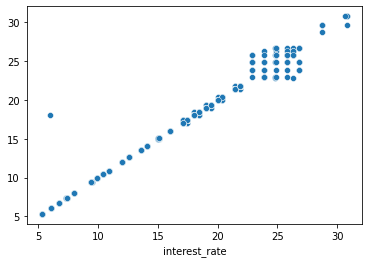

In [62]:
sns.scatterplot(y_test, y_pred_d)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate'>

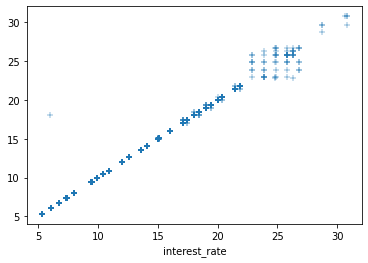

In [63]:
sns.scatterplot(y_test, y_pred_d, marker = "+")

In [ ]:
#We can se most of our predictios are very accurate except for some prediction where interest rate is high